# Exercice 1
### Régression linéaire
___

Supposons que nous avons des données de pairs de nombres réels $\mathbf X=(x_1,\ldots,x_n)\in \mathbb R^n$ et $\mathbf y = (y_1,\ldots,y_n)\in \mathbb R^n$. Supposons que $\mathbf X,\mathbf y$ satisfont $y_i = a x_i+b$ pour quelque $a,b\in \mathbb R$. Nous voulons trouver les valeurs de $a,b$. 

On peut écrire le condition $y_i=a x_i+b$ comme une équation linéaire
$$
    \mathbf y = a \mathbf X+b =  (\mathbf X\,\,\mathbf 1)\cdot \begin{pmatrix}a\\b\end{pmatrix},
$$
où $\mathbf 1 = (1,\ldots,1)$ est un vecteur de même taille que $\mathbf X$, et donc $(\mathbf X\,\,\mathbf 1)$ est une matrice de taille $n\times 2$. On peut donc obtenir $a,b$ en résolvant l'équation linéaire. 

Remarquons que l'équation linéaire est surdéterminée, et en pratique il y a du bruit aléatoire aussi (c'est-à-dire, $y_i=a x_i+b+\epsilon_i$ avec $\epsilon_i$ une variable aléatoire à petites valeurs). Donc généralement ce n'est pas possible de résoudre exactement, mais on peut trouver des $a,b$ qui minimisent
$$
    \|a \mathbf X+b-\mathbf y\| = \left\| (\mathbf X\,\,\mathbf 1)\cdot \begin{pmatrix}a\\b\end{pmatrix}-\mathbf y \right\|
$$


### Exercice 1 a) 
___

On va écrire une classe Python `LinearRegression` pour faire de la régression linéaire. On peut utiliser `np.linalg.lstsq` pour résoudre numériquement des équations linéaires $\mathbf A \mathbf x=\mathbf b$.

> Écrire la méthode `fit` de `LinearRegression` qui calcule les meilleures valeurs de $a,b$.


### Exercice 1 b)
___
Une mesure important de qualité de régression linéaire est le coefficient de corrélation $\rho_{\mathbf X, \mathbf y}$. Vous avez vu la définition dans le cours. Si $|\rho_{\mathbf X, \mathbf y}|$ est proche de 1, nous pouvons bien modeler la rélation entre $X$ et $y$ par une fonction linéaire, est si $|\rho_{\mathbf X, \mathbf y}|$ est proche de 0, un modèle linéair n'est pas valide.
> Écrivez la méthode `correlation_coefficient` qui calcule le coefficient de corrélation. Vous pouvez utiliser `np.mean` pour calculer la moyenne des données, et `np.std` pour calculer l'écart-type.

In [561]:
# Initialisation
# Évaluez cette cellule à le debut de chaque session
# Assurez-vous que cette cellule ne donne pas des erreurs

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [567]:

class LinearRegression:
    def __init__(self, X, y):
        """Initialisation de classe"""
        
        self.a, self.b = self.fit(X,y)
        
    def fit(self, X, y):
        """Calculer les meilleures valeurs de a,b.
        Donne un tuple (a,b)."""
        
        self.X=X
        self.y=y
        
        # La matrice (X 1)
        X_augmented = np.vstack([X, np.ones_like(X)]).transpose()
        
        # Calculer la solution du problème linéaire
        
        #------------------------
        # VOTRE CODE
        #on calcule les meilleurs valeurs de a et b grâce à np.linalg.lstsq
        a, b = np.linalg.lstsq(X_augmented, y, rcond=None)[0]
        return a,b
        #------------------------
        
        
        pass
    
    def predict(self, X):
        """Calculer aX+b"""
        return self.a*X+self.b
    
    def correlation_coefficient(self):
        """Calculer le coefficient de corrélation.
        Donne un nombre entre -1 et 1."""
        
        #------------------------
        # VOTRE CODE
        #on calcule la cov(x,y)
        xycovar = np.mean(self.X*self.y)-np.mean(self.X)*np.mean(self.y)
        #xycovar = np.mean((self.X-np.mean(self.X))*(self.y-np.mean(self.y)))
        #on calcule sigma pour x et y
        sigma1 = np.std(self.X)
        sigma2 = np.std(self.y)
        #on calcule le coeff de corrélation : cov(x,y)/(sigmaX*sigmay)
        coeff_corr = xycovar/(sigma1*sigma2)
        return coeff_corr
        #------------------------
        
        pass
    
    def plot(self):
        """Tracer les données X,y et sa régression linéaire"""
        fit_X = np.linspace(min(self.X),max(self.X),num=10)
        fit_y = self.predict(fit_X)
        
        plt.ylabel('y')
        plt.xlabel('X')
        
        plt.plot(self.X,self.y,'.')
        plt.plot(fit_X,fit_y,'r')
    

### Données linéaire

Nous pouvons tester la classe avec quelques données synthétiques.

D'abord nous prenons la rélation $y =1+2X+\mathcal N(0,0.1)$, où $\mathcal N(\mu,\sigma)$ est une variable aléatoire de loi normale avec espérance $\mu$ et écart-type $\sigma$. Idéalement nous voulons trouver que $a=2, b=1$ et un coefficient de corrélation $\rho=1$.

Nous trouvons que a=1.9996, b=0.9994.
Le coefficient de corrélation est : rho = 0.9967


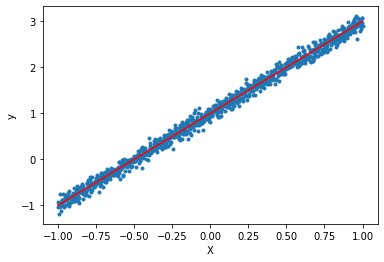

In [585]:
data_x = np.linspace(-1,1,1000)
data_y = 1+data_x*2+0.1*np.random.normal(size=len(data_x))

reg = LinearRegression(data_x, data_y)

print("Nous trouvons que a=%.4f, b=%.4f." % (reg.a,reg.b))

reg.plot()

rho = reg.correlation_coefficient()
print("Le coefficient de corrélation est : rho = %.4f" % rho)

Notons que si $a$ est négatif, le coefficient de corrélation est aussi négatif. Par exemple nous considérons $y = -X +\mathcal N(0,0.1)$.

Nous trouvons que a=-0.9973, b=-0.0020.
Le coefficient de corrélation est : rho = -0.9856


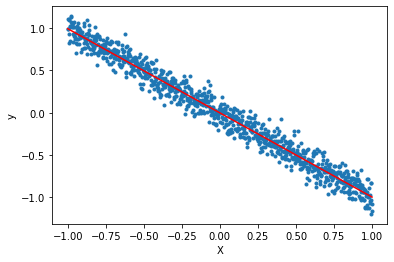

In [569]:
data_x = np.linspace(-1,1,1000)
data_y = -data_x+0.1*np.random.normal(size=len(data_x))

reg = LinearRegression(data_x, data_y)

print("Nous trouvons que a=%.4f, b=%.4f." % (reg.a,reg.b))

reg.plot()

rho = reg.correlation_coefficient()
print("Le coefficient de corrélation est : rho = %.4f" % rho)

### Données non linéaires

Quand la relation entre $y$ et $X$ n'est pas linéaire, on voit que la ligne n'est pas toujours proche des données, et on voit que le coefficient de corrélation n'est pas proche de $\pm 1$. Par exemple, ici nous prenons $y = (X+1)^2+\mathcal N(0,0.1)$.

Le coefficient de corrélation est : rho = 0.8881


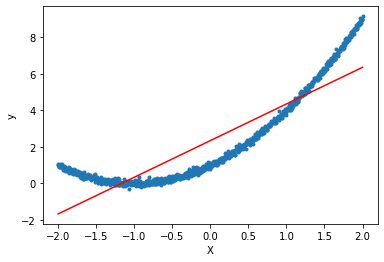

In [570]:
data_x = np.linspace(-2,2,1000)
data_y = (data_x+1)**2+0.1*np.random.normal(size=len(data_x))

reg = LinearRegression(data_x, data_y)

reg.plot()
rho = reg.correlation_coefficient()
print("Le coefficient de corrélation est : rho = %.4f" % rho)

Nous pouvons considérer des relations plus compliquées aussi. Par exemple considérons $y=\sin(X)+\mathcal N(0,0.1)$.

Le coefficient de corrélation est : rho = 0.7740


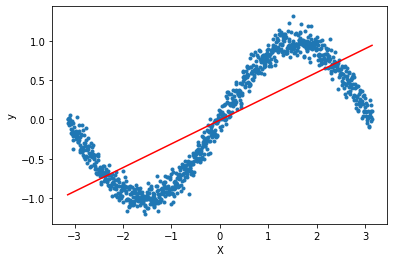

In [571]:
data_x = np.linspace(-np.pi,np.pi,1000)
data_y = np.sin(data_x)+0.1*np.random.normal(size=len(data_x))

reg = LinearRegression(data_x, data_y)

reg.plot()
rho = reg.correlation_coefficient()
print("Le coefficient de corrélation est : rho = %.4f" % rho)

# Exercice 2
### L'algorithme du gradient
___

Nous avons vu que la régression linéaire ne donne pas un bon modèle dans tous les cas. Par conséquent nous devons utiliser de la régression non linéaire. Supposons que nous avons des variables aléatoires $X,y$ à valeurs réels avec relation
$$ y = f(X)+\mathcal N(0,\sigma).$$
où $\mathcal N(0,\sigma)$ dénote une loi normale d'espérance $0$ et écart-type $\sigma$, et $f$ et une fonction différentiable.

Étant donné un échantillon $(x_1,\dots,x_n)$ et $(y_1,\dots y_n)$ de ses variables aléatoires, la tâche est de déterminer $f$. Pour résoudre ce problème nous devons supposer que $f=\theta_{\mathbf a}$ où $\theta_{\mathbf a}\colon \mathbb R\to\mathbb R$ est une fonction dépendante de paramètres $\mathbf a = (a_1,\dots,a_k)\in \mathbb R^k$, de plus $\theta_{\mathbf a}$ est différentiable par rapport à tous les paramètres $a_i$. Dans ce cas, nous pouvons trouver les meilleures valeurs des paramètres $a_i$ en minimisant la fonction objectif
$$
    L(a_1,\ldots,a_k)=\frac1n\sum_{i=1}^n(\theta_{a_1,\ldots,a_k}(x_i)-y_i)^2.
$$

En géneral c'est impossible de trouver une formule exacte pour le minimum de $L$, et on doit utiliser des méthodes numériques. Une méthode très génerale est l'algorithme du gradient. Rappelons que le gradient $$\nabla f(x_1,\ldots,x_n) = \left(\frac{\partial}{\partial x_1}f(x_1,\dots,x_n),\dots, \frac{\partial}{\partial x_n}f(x_1,\dots,x_n)\right)$$ d'une fonction $f\colon\mathbb R^k\to \mathbb R$ est toujours perpendiculaire aux ensembles de niveau et donc en direction du maximum de la fonction. L'algorithme du gradient procède comme suit :

> __Algorithme du gradient__ <br/>
Fixer un taux d'apprentissage $\gamma>0$, une tolérance $\varepsilon>0$, et un nombre maxmimum d'itérations $N$.
- Initialiser avec paramètres $\mathbf x_0 \in \mathbb R^k$
- Itérer sur $1\leq n\leq N$ :
    - Calculer $\mathbf x_n = \mathbf x_{n-1}-\gamma \nabla f(\mathbf x_{n-1})$
    - Arrêter si $\|x_n-x_{n-1}\|\leq \varepsilon$.
    
D'abord on va implémenter cet algorithme et l'utiliser pour trouver le minimum de certaines fonctions simples.

### Exercice 2 a)
> Complétez le code de la classe `GradientDescent` ci-dessous qui implémente l'algorithme du gradient

In [574]:
class GradientDescent:
    def __init__(self, df, params, gamma=0.01):
        """Minimiser la fonction f par l'algorithme du gradient
        
        Paramètres
        -----
        df : gradient de la fonction f
        params : paramètres initiales
        gamma : taux d'apprentissage"""
        
        self.df = df
        self.gamma = gamma
        self.params = np.array(params) # Convertir en un array de numpy 
    def step(self):
        """Faire une étape d'algorithme"""
        #on définit x comme f(x) de la dérivée de f(x) 
        x = self.df(self.params)
        #on calcul l'étape : 𝐱𝑛=𝐱𝑛−1−𝛾∇𝑓(𝐱𝑛−1)
        self.params = self.params - self.gamma*x# VOTRE CODE
        #return xn
        return self.params
    def minimize(self, precision=1e-9, max_iters=1000):
        """Faire tous les étapes d'algorithme"""
        
        for element in range(max_iters):
            #params_old = xn-1
            params_old = self.params
            #appelle xn
            self.step()
            # Arrêter si la difference est moins de tolérance
            
            # VOTRE CODE
            #on arrete si notre approximation est suffisament bonne : ‖𝑥𝑛−𝑥𝑛−1‖≤𝜀
            if np.linalg.norm(self.params - params_old) <= precision:
                break  
        #return x minimum
        return self.params
        

Essayons d'utiliser la classe ci-dessus pour minimiser la fonction $x^2+2x+1$. Sa dérivé est égale à $2x+2$. On voit que l'algorithme a bien trouvé le minimum $x=-1$.

In [575]:
def df(x):
    return 2*x[0]+2  # Notons que x est toujours une liste
gd = GradientDescent(df, [0])
gd.minimize()

array([-0.99999995])

Nous pouvons aussi utiliser plusieurs variables. Par exemple, prenons $f(x,y,z) = (x+1)^2+(y-2)^2+(z-1)^4$ avec gradient $(2x+2,2y-4,4z^3-4)$ et minimum ($-1,2,1)$.

In [576]:
def df(x):
    return np.array([2+2*x[0], 2*x[1]-4, 4*x[2]**3-4])
gd = GradientDescent(df,[0,0,0])
gd.minimize()

array([-0.99999998,  1.99999996,  1.        ])

Si la fonction n'a pas de minimum l'algorithme ne marche pas. Par exemple, prenons $f(x)=x^3+x$, avec gradient $f'(x) = 3x^2+1$

In [577]:
def df(x):
    return np.array([3*x[0]**2+1])
gd = GradientDescent(df, [0])
gd.minimize()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in subtract


array([-inf])

### Exercice 2 b)
> Utilisez l'algorithme du gradient pour calculer le minimum de $\sin(x)$ avec valeur initiale $x_0=0$. Comparez la valeur obtenue à $-\pi/2$.

In [578]:
def df(x):
    return np.array([np.cos(x[0])])# VOTRE CODE
    #on obtient la valeur minimum -1.57079628, c'est approximativement égal à −𝜋/2 = -1.57079632
    pass

gd = GradientDescent(df,[0])
gd.minimize()

array([-1.57070968])

## Exercice 3
### Régression non linéaire
___

Nous allons appliquer l'algorithme du gradient à la régression non linéaire. Rappelons que $\theta_{\mathbf a}$ est différentiable par rapport à tous les paramètres $a_i$, et que nous voulons minimiser la fonction objectif 
$$
    L(a_1,\ldots,a_k)=\frac1n\sum_{i=1}^n(\theta_{\mathbf a}(x_i)-y_i)^2
$$
Nous calculons le gradient :
$$
    \nabla L(a_1,\ldots,a_k) = \frac1n\sum_{i=1}^n2(\theta_{\mathbf a}(x_i)-y_i)\nabla \theta_{\mathbf a}(x_i)
$$
Donc pour appliquer l'algorithme du gradient, nous devons à chaque étape calculer $\theta_{\mathbf a}(x_i)$ et $\nabla\theta_{\mathbf a}(x_i)$ pour chaque $x_i$.

### Exercice 3 a)
> Complétez le code de la classe `NonLinearRegression` ci-dessous qui implémente la régression non linéaire

In [579]:
class NonLinearRegression:
    def __init__(self, X, y, theta, dtheta, params, gamma=0.01, precision=1e-5, max_iters=1000):
        """
        Une classe pour régression non linéaire.
        
        Paramètres:
        -------
        X : tableau des échantillons de variable aléatoire X
        y : tableau des échantillons de variable aléatoire y
        theta : fonction paramétrique de la forme theta(params, X)
        dtheta : gradient du theta, fonction de la forme dtheta(params, X)
        params : paramètres initiale de theta
        gamma : taux d'apprentissage d'algorithme du gradient
        precision : tolérance d'algorithme du gradient
        max_iters : nombre maximal des étapes d'algorithme du gradient
        """
        
        # Conserver tous les paramètres dans la classe
        self.X = X
        self.y = y
        self.theta = theta
        self.dtheta = dtheta
        self.params = np.array(params)
        self.gamma = gamma
        self.precision=precision
        self.max_iters = max_iters
        
    def predict(self,X):
        """Utiliser les paramètres actuels pour fair une prédiction theta(X)"""
        
        return np.array([self.theta(self.params,x) for x in X])
        
    def loss(self):
        """Calculer la fonction objectif avec paramètres actuels"""
        
        predictions = self.predict(self.X)
        square_difference = (predictions-self.y)**2
        loss = np.mean(square_difference)/len(self.X)
        return loss
    
    def loss_gradient(self):
        """Calculer le gradient de la fonction objectif
        Donne un nombre."""
        
        predictions = self.predict(self.X)
        gradients = np.array([self.dtheta(self.params,x) for x in self.X])
        
        # Votre code pour grad_loss
        # Utilisez `predictions` et `gradients`
        # N'oubliez pas de diviser par len(self.X).
        #on calcule : (1/𝑛)∑((𝑖=1)->𝑛) 2*(𝜃𝐚(𝑥𝑖)−𝑦𝑖)∇𝜃𝐚(𝑥𝑖)
        grad_loss = np.dot((predictions-self.y)*2,(gradients))/len(self.X)
        # Normaliser et couper les gradients pour raisons de convergence
        grad_loss = np.clip(grad_loss,-1,1)
        
        return grad_loss

    def define_gradient(self):
        """Definer une fonction du gradient de la fonction objectif en 
        utilisant l'algorithme du gradient"""
        
        def grad(params):
            self.params = np.array(params)
            return self.loss_gradient()
        
        return grad
    
    def fit(self):
        """Calculer paremètres optimal par l'algorithme du gradient"""
        
        grad = self.define_gradient()
        gd = GradientDescent(grad,self.params,gamma=self.gamma)
        gd.minimize(precision=self.precision, max_iters=self.max_iters)
        return self.params
    
    def plot(self, num_points=100):
        """Tracer les données avec les prédictions dans un seul graphique"""
        
        # faire les prédictions
        fit_X = np.linspace(min(self.X),max(self.X),num=num_points)
        fit_y = self.predict(fit_X)
        
        # tracer les données
        plt.plot(self.X,self.y,'.')
        
        # tracer les prédictions
        plt.plot(fit_X,fit_y,'r')
        
        plt.ylabel('y')
        plt.xlabel('X')

### Modèle linéaire

D'abord nous allons appliquer l'algorithme de la régression non linéaire à un modèle linéaire. Le modèle est donnée par
$$
    \theta_{a,b}(x) = ax +b,\qquad \nabla \theta_{a,b}(x) = (x,1)
$$
On voit que ceci trouve des bons paramètres $a,b$, mais cela prend plus de temps que l'algorithme de la régression linéaire.

On trouve des paramètres a=1.9959, b=1.0064


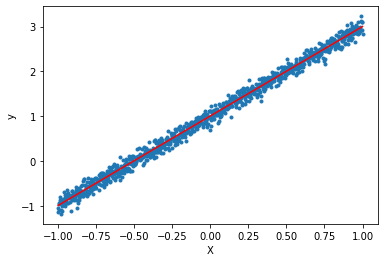

In [581]:
def theta(params,x):
    return params[0]*x+params[1]

def dtheta(params,x):
    return np.array([x,1])

data_x = np.linspace(-1,1,1000)
data_y = 1+data_x*2+0.1*np.random.normal(size=len(data_x))

nlr = NonLinearRegression(data_x, data_y, theta, dtheta, [0,0])
nlr.fit()
nlr.plot()
print("On trouve des paramètres a=%.4f, b=%.4f" % tuple(nlr.params))

### Modèle parabolique
Puis nous prenons des données paraboliques. On va utiliser le modèle
$$
    \theta_{a,b,c}(x) = ax^2+bx+c,\qquad \nabla\theta_{a,b,c}(x) = (x^2,x,1)
$$
On voit que l'algrotihme à bien trouvé les paramètres proche de (1,2,1).

On trouve des paramètres a=1.0011, b=1.9995, c=1.0007


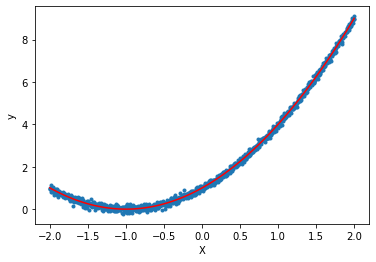

In [582]:
def theta(params,x):
    return params[0]*(x**2)+params[1]*x+params[2]

def dtheta(params,x):
    return np.array([x**2,x,1])

data_x = np.linspace(-2,2,1000)
data_y = (data_x+1)**2+0.1*np.random.normal(size=len(data_x))

nlr = NonLinearRegression(data_x, data_y, theta, dtheta, [0,0,0])
nlr.fit()
nlr.plot()
print("On trouve des paramètres a=%.4f, b=%.4f, c=%.4f" % tuple(nlr.params))

### Modèle sinusoïdal
Considérons le modèle
$$
    \theta_{a,b,c,d}(x) = c\sin(ax+b)+d,\qquad \nabla\theta_{a,b,c,d}(x)=(cx\cos(ax+b),c\cos(ax+b),\sin(ax+b),1)
$$
Même pour les modèles plus compliqués on voit que l'algorithme trouve les bon paramètres.

On trouve des paramètres a=1.0005, b=-0.0021, c=0.9980, d=0.0046


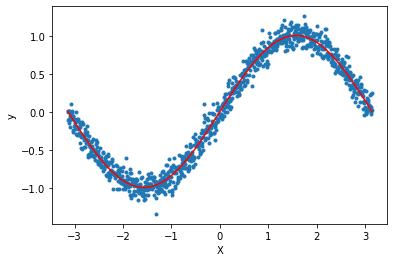

In [583]:
def theta(params,x):
    return params[2]*np.sin(x*params[0]+params[1])+params[3]

def dtheta(params,x):
    return np.array([params[2]*x*np.cos(x*params[0]+params[1]),
                    params[2]*np.cos(x*params[0]+params[1]),
                    np.sin(x*params[0]+params[1]),
                    1])

data_x = np.linspace(-np.pi,np.pi,1000)
data_y = np.sin(data_x)+0.1*np.random.normal(size=len(data_x))

nlr = NonLinearRegression(data_x, data_y, theta, dtheta, [1,1,1,0])
nlr.fit()
nlr.plot()
print("On trouve des paramètres a=%.4f, b=%.4f, c=%.4f, d=%.4f" % tuple(nlr.params))

## Exercice 3b)
> Écrivez le code pour `theta` et `dtheta` ci-dessous pour un modèle de la forme $\theta_{a,b,c,d}=a+bx+cx^2+dx^3+ex^4$ et faites de la régression non linéaire. Comparez les resultats à l'expansion de Taylor de $\sin(x)$.

On trouve des paramètres a=0.0013, b=0.9447, c=-0.0010, d=-0.1255, e=0.0000


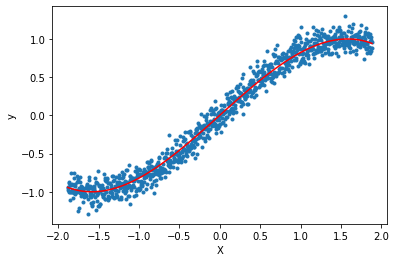

In [584]:
def theta(params,x):
    return params[0]+params[1]*x+params[2]*(x**2)+params[3]*(x**3)+params[4]*(x**4)

def dtheta(params,x):
    return np.array([1,x,x**2,x**3,x**4])


data_x = np.linspace(-np.pi*0.6,np.pi*0.6,1000)
data_y = np.sin(data_x)+0.1*np.random.normal(size=len(data_x))

nlr = NonLinearRegression(data_x, data_y, theta, dtheta, [0,0,0,0,0])
nlr.fit()
nlr.plot()
print("On trouve des paramètres a=%.4f, b=%.4f, c=%.4f, d=%.4f, e=%.4f" % tuple(nlr.params))